# Introduction to Convolutional Neural Networks and Computer Vision with

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

Video N°107: Downloading an image dataset for our first Food Vision model

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
--2024-03-13 19:20:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.36.27, 142.251.36.59, 142.251.39.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.36.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip'

pizza_steak.zip     100%[===================>] 104.47M  9.80MB/s    in 11s     

2024-03-13 19:21:05 (9.50 MB/s) - 'pizza_steak.zip' saved [109540975/109540975]



Video N°108: Becoming One With Data

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project... this usually means visualizing many samples of your data.

In [1]:
!ls pizza_steak

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
test  train


In [2]:
!ls pizza_steak/train/

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
pizza  steak


In [3]:
!ls pizza_steak/train/steak

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775

In [4]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 0 directories and 250 images in pizza_steak/test/pizza.


In [5]:
!ls -al pizza_steak

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
total 16
drwxr-xr-x 4 wm18vw wm18vw 4096 Mar 13 19:21 .
drwxr-xr-x 3 wm18vw wm18vw 4096 Mar 14 11:32 ..
drwxr-xr-x 4 wm18vw wm18vw 4096 Mar 13 19:21 test
drwxr-xr-x 4 wm18vw wm18vw 4096 Mar 13 19:21 train


Video N°109: Becoming One With Data Part 2

In [6]:
# Another way to find out how many images are in a directory
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['513129.jpg']
Image shape: (512, 512, 3)


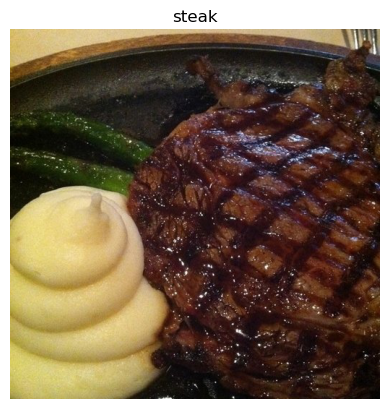

In [9]:
# View a random image from the training dataset
img = view_random_images(target_dir="pizza_steak/train/",
                         target_class="steak")

In [10]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

2024-03-14 11:32:42.381785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 11:32:45.422879: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-14 11:32:45.594428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-14 11:32:45.594633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there m

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[213, 191, 105],
        [211, 189, 103],
        [209, 187, 101],
        ...,
        [167, 157, 121],
        [165, 151, 112],
        [165, 152, 108]],

       [[211, 189, 103],
        [208, 186, 100],
        [210, 188, 102],
        ...,
        [172, 162, 126],
        [168, 154, 115],
        [165, 152, 108]],

       [[213, 192, 103],
        [209, 188,  99],
        [217, 193, 107],
        ...,
        [170, 160, 124],
        [166, 152, 113],
        [160, 147, 103]],

       ...,

       [[147, 139,  58],
        [151, 143,  62],
        [154, 146,  65],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  6,   6,   6]],

       [[144, 137,  56],
        [147, 140,  59],
        [151, 144,  63],
        ...,
        [  4,   4,   4],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[132, 126,  42],
        [133, 126,  45],
        [137, 130,  49],
        ...,
        [  1,   1,   

Video N°110: Becoming One With Data Part 3

In [11]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [12]:
img.min(), img.max()

(0, 255)

In [13]:
# Get all the pixel values between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
img/255

array([[[0.83529412, 0.74901961, 0.41176471],
        [0.82745098, 0.74117647, 0.40392157],
        [0.81960784, 0.73333333, 0.39607843],
        ...,
        [0.65490196, 0.61568627, 0.4745098 ],
        [0.64705882, 0.59215686, 0.43921569],
        [0.64705882, 0.59607843, 0.42352941]],

       [[0.82745098, 0.74117647, 0.40392157],
        [0.81568627, 0.72941176, 0.39215686],
        [0.82352941, 0.7372549 , 0.4       ],
        ...,
        [0.6745098 , 0.63529412, 0.49411765],
        [0.65882353, 0.60392157, 0.45098039],
        [0.64705882, 0.59607843, 0.42352941]],

       [[0.83529412, 0.75294118, 0.40392157],
        [0.81960784, 0.7372549 , 0.38823529],
        [0.85098039, 0.75686275, 0.41960784],
        ...,
        [0.66666667, 0.62745098, 0.48627451],
        [0.65098039, 0.59607843, 0.44313725],
        [0.62745098, 0.57647059, 0.40392157]],

       ...,

       [[0.57647059, 0.54509804, 0.22745098],
        [0.59215686, 0.56078431, 0.24313725],
        [0.60392157, 0

Video N°111: Building an end to end CNN Model

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = pathlib.Path("pizza_steak/train")
test_dir = pathlib.Path("pizza_steak/test")

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu,
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=2,
                                 padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.BinaryAccuracy())

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2024-03-14 11:32:47.028849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8902
2024-03-14 11:32:47.243236: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-14 11:32:47.670750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-03-14 11:32:47.675969: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f1bccbd2b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-14 11:32:47.675996: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-03-14 11:32:47.697841: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-14 11:32:47.84937

47/47 [==============================] - 13s 194ms/step - loss: 0.6147 - binary_accuracy: 0.6587 - val_loss: 0.4536 - val_binary_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4436 - binary_accuracy: 0.7960 - val_loss: 0.3718 - val_binary_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4004 - binary_accuracy: 0.8240 - val_loss: 0.3278 - val_binary_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3411 - binary_accuracy: 0.8593 - val_loss: 0.3297 - val_binary_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.2699 - binary_accuracy: 0.8987 - val_loss: 0.2913 - val_binary_accuracy: 0.8780


Video N°112: Using a GPU to run our CNN model 5x faster

> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU.

In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🛠 **Practice/exercise:** Go through the CNN explainer website for a minimum of 10 minutes and compare our neural network with theirs: https://poloclub.github.io/cnn-explainer/

Video N°113: Trying a non-CNN model on our image data

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.32373&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [16]:
train_data

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.BinaryAccuracy())

# Fir the model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 149ms/step - loss: 0.9458 - binary_accuracy: 0.4920 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 153ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6932 - binary_accuracy: 0.4787 - val_loss: 0.6931 - val_binary_accuracy: 0.5000


Video N°114: Improving our non-CNN model by adding more layers

In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [20]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.BinaryCrossentropy())

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 142ms/step - loss: 2.9610 - binary_crossentropy: 2.9610 - val_loss: 0.5255 - val_binary_crossentropy: 0.5255
Epoch 2/5
47/47 [==============================] - 7s 139ms/step - loss: 0.7432 - binary_crossentropy: 0.7432 - val_loss: 0.7800 - val_binary_crossentropy: 0.7800
Epoch 3/5
47/47 [==============================] - 7s 153ms/step - loss: 0.5936 - binary_crossentropy: 0.5936 - val_loss: 0.4784 - val_binary_crossentropy: 0.4784
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.7585 - binary_crossentropy: 0.7585 - val_loss: 0.4909 - val_binary_crossentropy: 0.4909
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.5360 - binary_crossentropy: 0.5360 - val_loss: 0.4765 - val_binary_crossentropy: 0.4765


In [21]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [23]:
15073201/31101

484.6532587376612

Video N°115: Breaking our CNN model down part 1: Becoming one with the data

🔑 **Note:** You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**.
So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our basline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2090493.jpg']
Image shape: (512, 512, 3)
['320570.jpg']
Image shape: (512, 382, 3)


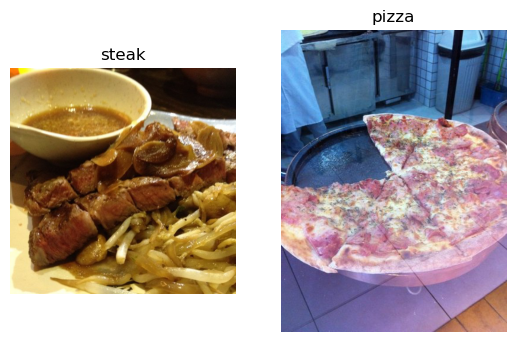

In [26]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_images("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_images("pizza_steak/train/", "pizza")

Video N°116: Breaking our CNN model down part 2: Preparing to load our data

### 2. Preprocess the data (prepare it for a model)

In [27]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.
3.  

In [28]:
!nvidia-smi

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Thu Mar 14 14:23:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050        On  | 00000000:09:00.0  On |                  N/A |
|  0%   44C    P5              12W / 130W |   6468MiB /  8192MiB |     33%      Default |
|                                         |                      |                  